In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import os
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Device: {device}')

data_folder = Path("../../data")

# Necessary for notebook to see src package
import sys
sys.path.append('../..')

Device: cuda


# Load The Dataset

In [ ]:
insurance_dataset_path = data_folder / 'insurance.csv'
insurance_dataset = pd.read_csv(insurance_dataset_path)

dataset = insurance_dataset.copy(deep=True)

# General Info

In [5]:
# No Null Values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
# Get the cardinality

n_unique = dataset.nunique()

cardinality = pd.DataFrame(
    data={
        'Feature': n_unique.index,
        'Cardinality': n_unique.values
    }
)

# Family, Personal Loan, Securities Account, CD Account, Online and Credit Card columns are discrete columns

display(cardinality.style.hide(axis='index'))

Feature,Cardinality
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [8]:
discrete_columns = [col for col in dataset.columns if dataset[col].nunique() < 10]
continuous_columns = [col for col in dataset.columns if col not in discrete_columns]

print(discrete_columns)
print(continuous_columns)

['sex', 'children', 'smoker', 'region']
['age', 'bmi', 'charges']


# Continous Features

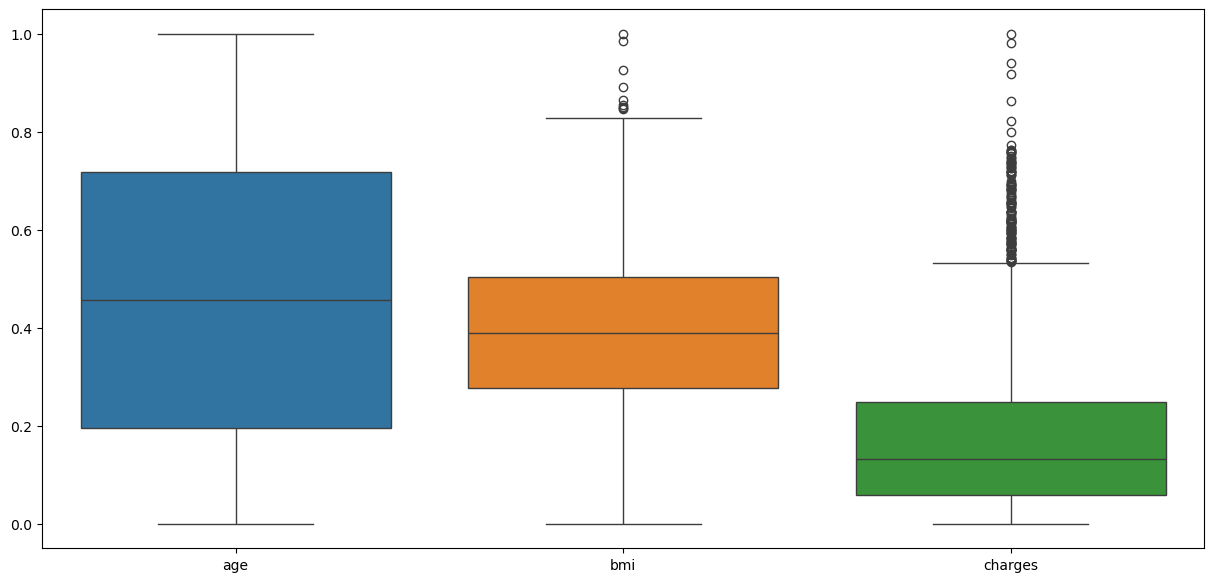

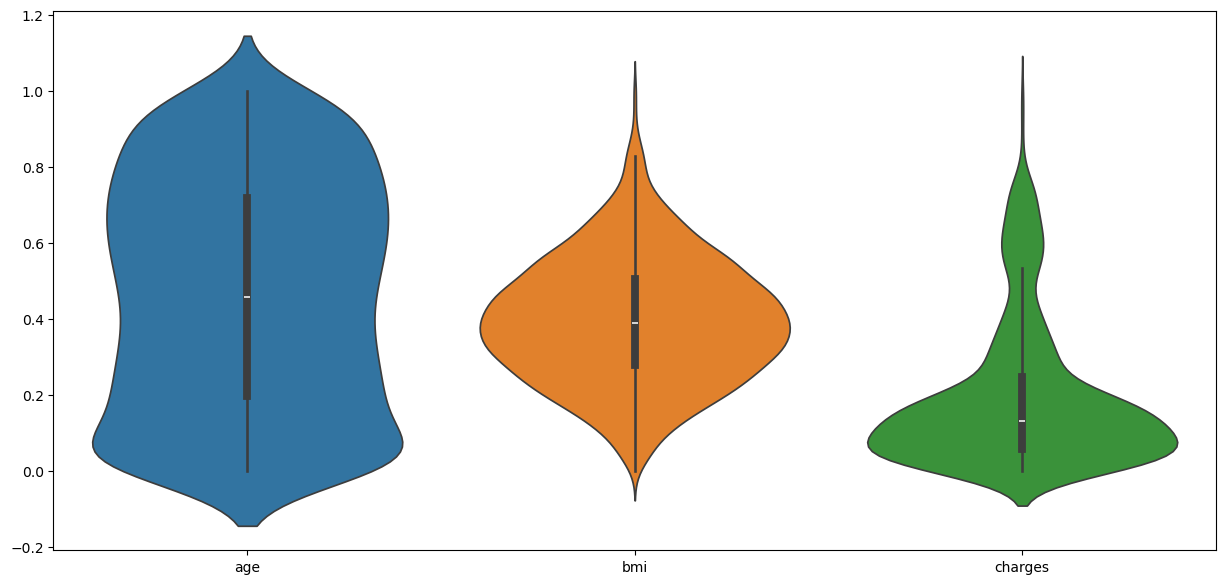

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

scaled_data = scaler.fit_transform(dataset[continuous_columns])

plt.figure(figsize=(15, 7))
sns.boxplot(data=scaled_data)
# sns.stripplot(data=scaled_data, jitter=False, color='k', alpha=0.6, size=6)

plt.show()

plt.figure(figsize=(15, 7))
sns.violinplot(
    data=scaled_data,
    inner='box',
    density_norm='area',
)
plt.show()


# Discrete Features

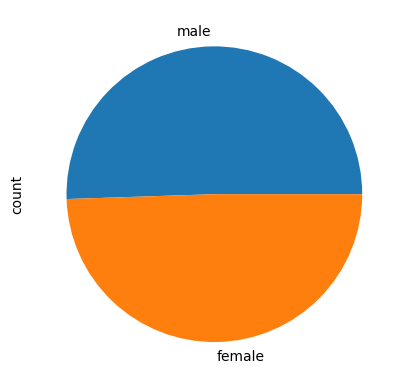

In [10]:
dataset['sex'].value_counts().plot.pie()
plt.show()

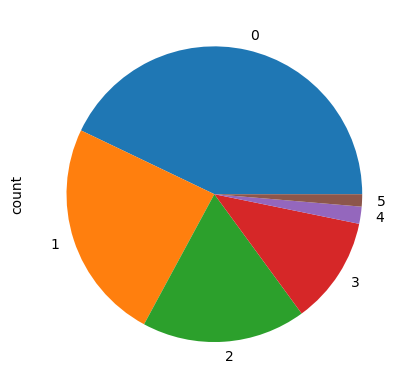

In [11]:
dataset['children'].value_counts().plot.pie()
plt.show()

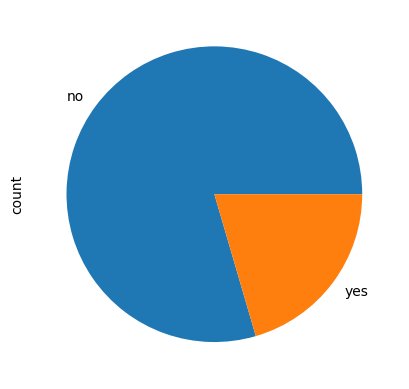

In [12]:
dataset['smoker'].value_counts().plot.pie()
plt.show()

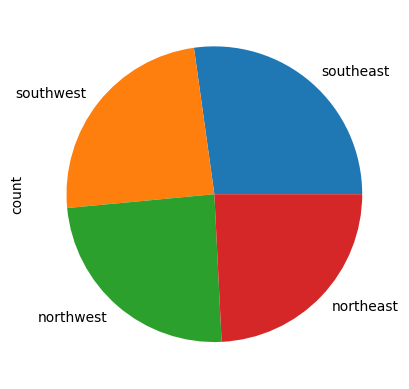

In [13]:
dataset['region'].value_counts().plot.pie()
plt.show()